# **Aim**

# Predict the movie genre

# **Loading the DataSet**

In [2]:
#Importing the Neccasary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#Loading The DataSet

df=pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\AI Summer Training\DataSets\real_movie_titles_dataset.csv")
df

,movie_id,title,year,duration,avg_rating,description,has_romance,has_action,has_comedy,genre
0,1,Casablanca,2007,94,4.7,A gripping story with life and struggle themes.,0,0,0,Drama
1,2,It,2017,124,7.2,A gripping story with relationship and heart t...,1,0,0,Romance
2,3,Toy Story,2005,61,6.8,A gripping story with ghost and scream themes.,0,0,0,Horror
3,4,Black Panther,2022,108,6.1,A gripping story with war and gunfight themes.,0,1,0,Action
4,5,Guardians of the Galaxy,2008,141,3.9,A gripping story with family and emotion themes.,0,0,0,Drama
...,...,...,...,...,...,...,...,...,...,...
4995,4996,E.T.,1992,66,7.0,A gripping story with kiss and romantic themes.,1,0,0,Romance
4996,4997,Wonder Woman,1994,135,5.0,A gripping story with chase and battle themes.,0,1,0,Action
4997,4998,The Departed,2016,165,2.6,A gripping story with scream and ghost themes.,0,0,0,Horror
4998,4999,The Sixth Sense,2012,74,5.5,A gripping story with murder and scream themes.,0,0,0,Horror


# **DataSet**

In [4]:
df

,movie_id,title,year,duration,avg_rating,description,has_romance,has_action,has_comedy,genre
0,1,Casablanca,2007,94,4.7,A gripping story with life and struggle themes.,0,0,0,Drama
1,2,It,2017,124,7.2,A gripping story with relationship and heart t...,1,0,0,Romance
2,3,Toy Story,2005,61,6.8,A gripping story with ghost and scream themes.,0,0,0,Horror
3,4,Black Panther,2022,108,6.1,A gripping story with war and gunfight themes.,0,1,0,Action
4,5,Guardians of the Galaxy,2008,141,3.9,A gripping story with family and emotion themes.,0,0,0,Drama
...,...,...,...,...,...,...,...,...,...,...
4995,4996,E.T.,1992,66,7.0,A gripping story with kiss and romantic themes.,1,0,0,Romance
4996,4997,Wonder Woman,1994,135,5.0,A gripping story with chase and battle themes.,0,1,0,Action
4997,4998,The Departed,2016,165,2.6,A gripping story with scream and ghost themes.,0,0,0,Horror
4998,4999,The Sixth Sense,2012,74,5.5,A gripping story with murder and scream themes.,0,0,0,Horror


In [5]:
#Gathering Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_id     5000 non-null   int64  
 1   title        5000 non-null   object 
 2   year         5000 non-null   int64  
 3   duration     5000 non-null   int64  
 4   avg_rating   5000 non-null   float64
 5   description  5000 non-null   object 
 6   has_romance  5000 non-null   int64  
 7   has_action   5000 non-null   int64  
 8   has_comedy   5000 non-null   int64  
 9   genre        5000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 390.8+ KB


In [6]:
#Checking Null Values
df.isnull().sum()

movie_id       0
title          0
year           0
duration       0
avg_rating     0
description    0
has_romance    0
has_action     0
has_comedy     0
genre          0
dtype: int64

In [7]:
#checking Duplicates
df.duplicated().sum()

0

In [8]:
#Gathering the description of the data

df.describe()

,movie_id,year,duration,avg_rating,has_romance,has_action,has_comedy
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,2001.39720,120.035600,5.479920,0.171400,0.168600,0.164600
std,1443.520003,12.40483,34.671244,2.592258,0.376896,0.374436,0.370856
min,1.000000,1980.00000,60.000000,1.000000,0.000000,0.000000,0.000000
25%,1250.750000,1991.00000,91.000000,3.200000,0.000000,0.000000,0.000000
50%,2500.500000,2002.00000,121.000000,5.400000,0.000000,0.000000,0.000000
75%,3750.250000,2012.00000,150.000000,7.800000,0.000000,0.000000,0.000000
max,5000.000000,2022.00000,179.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df['genre'].value_counts()

genre
Romance    857
Horror     850
Action     843
Comedy     823
Sci-Fi     822
Drama      805
Name: count, dtype: int64

# **Data Cleaning**

# There is no Data that needs to be cleaned

# **Data Transformation**

In [10]:
#importing LabelEncoder from Sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder

#Assigning LabelEncoder class to a variable 
le=LabelEncoder()

# Transforming categorical labels (text) into numeric codes.


#Converting Title
df['title']=le.fit_transform(df['title'])

#Converting Description
df['description']=le.fit_transform(df['description'])

#Converting Genre
df['genre']=le.fit_transform(df['genre'])



# **Step 5: Data Visualization**

<Axes: xlabel='movie_id'>

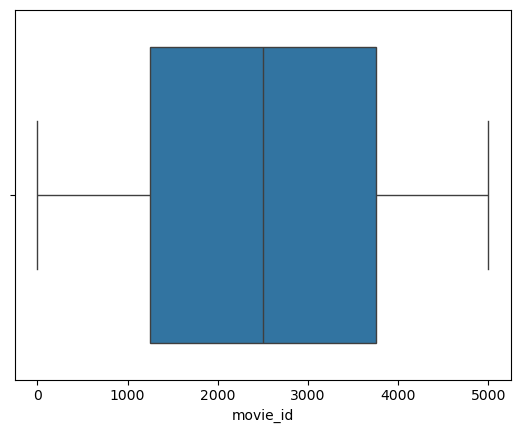

In [11]:
# making a boxplot

sns.boxplot(x='movie_id', data=df)

<Axes: xlabel='title'>

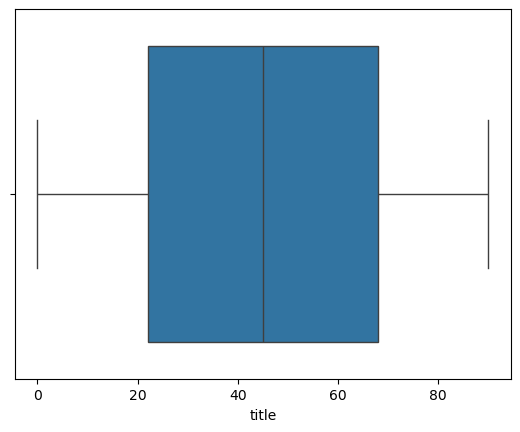

In [12]:
sns.boxplot(x='title', data=df)

<Axes: xlabel='year'>

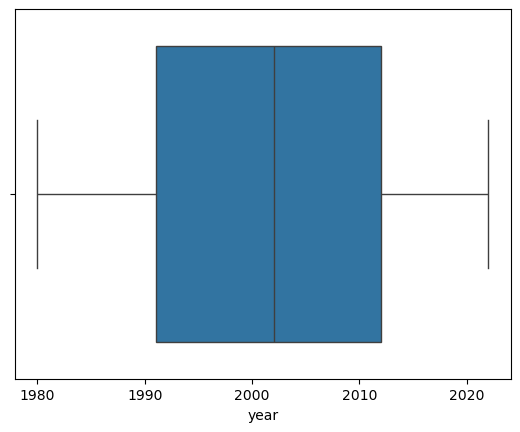

In [13]:
sns.boxplot(x='year', data=df)

<Axes: xlabel='duration'>

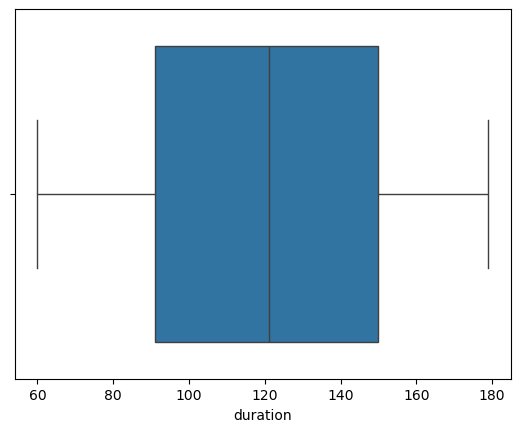

In [14]:
sns.boxplot(x='duration', data=df)

<Axes: xlabel='avg_rating'>

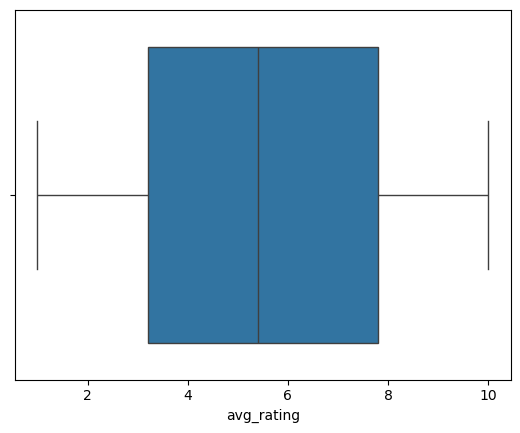

In [15]:
sns.boxplot(x='avg_rating', data=df)

# **Calculating Outliers using IQR Method**

In [16]:
# # IQR Formula
# Data value > Q1 - 1.5*IQR
# Data value < Q3 + 1.5*IQR



#Calculating Q1

Q1=df['duration'].quantile(0.25)

#Calculating Q3

Q3=df['duration'].quantile(0.50)


#Calculating IQR

IQR=Q3-Q1

#Calculating Thresholds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

 
#Calculating Outliers

found_outliers=False

for i in df['duration']:
    if i < lower or i > upper:
        print(i, "is an outlier")
        found_outliers=True

if not found_outliers:
    print("There were no outliers found in the Dataset")





172 is an outlier
168 is an outlier
170 is an outlier
171 is an outlier
172 is an outlier
176 is an outlier
169 is an outlier
168 is an outlier
168 is an outlier
170 is an outlier
177 is an outlier
175 is an outlier
171 is an outlier
172 is an outlier
172 is an outlier
174 is an outlier
176 is an outlier
179 is an outlier
171 is an outlier
178 is an outlier
170 is an outlier
176 is an outlier
179 is an outlier
178 is an outlier
168 is an outlier
176 is an outlier
167 is an outlier
174 is an outlier
175 is an outlier
179 is an outlier
178 is an outlier
173 is an outlier
170 is an outlier
179 is an outlier
173 is an outlier
178 is an outlier
175 is an outlier
175 is an outlier
173 is an outlier
177 is an outlier
167 is an outlier
169 is an outlier
174 is an outlier
175 is an outlier
179 is an outlier
175 is an outlier
173 is an outlier
177 is an outlier
174 is an outlier
179 is an outlier
167 is an outlier
167 is an outlier
172 is an outlier
176 is an outlier
167 is an outlier
179 is an 

In [17]:
#Calculating Percentage of the outliers in the column"duration"

#calculating the rows of the dataset
total_rows=len(df)

#calculating the numbers of the outliers in the column
outliers_count=df[(df['duration'] < lower )| (df['duration'] > upper) ].shape[0]

#calculating the percentage

outliers_percent=(outliers_count/total_rows)*100

#displaying the percentage of outliers
print(f"The percentage of outliers found is: {outliers_percent:.2f}%")

The percentage of outliers found is: 10.80%


As the percentage of the outliers are approximately 10%, that means, we can avoid treating them as they are not an issue for our purpose.

# **Train_Test_Split**

In [18]:
from sklearn.model_selection import train_test_split

#Assigning the input columns and the target column to variables

x=df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=df['genre']

#Spliting the into two parts: training and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)


# **Build Model**

# **Logistic Regression**

In [19]:
#importing LogisticRegression Algoritm from sklearn.linear_model

from sklearn.linear_model import LogisticRegression

# Building the Model Variable

Genre_Predictor=LogisticRegression(max_iter=1000)


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy1=accuracy_score(y_test,y_pred)

print(accuracy1)


#Validation
a1=le.inverse_transform(Genre_Predictor.predict
                        ([[4996,19,1992,66,7.0,59,1,0,0]]))
b1=le.inverse_transform(Genre_Predictor.predict
                        ([[4998,69,2016,165,2.6,100,0,0,0]]))
c1=le.inverse_transform(Genre_Predictor.predict
                        ([[5000,45,1980,148,8.1,53,0,0,1]]))


0.706


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but 

# **Decision tree**

In [20]:
#importing DecisionTreeClassifier Algoritm from sklearn.tree

from sklearn.tree import DecisionTreeClassifier

# Building the Model Variable

Genre_Predictor=DecisionTreeClassifier()


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy2=accuracy_score(y_test,y_pred)

print(accuracy2)

a2=le.inverse_transform(Genre_Predictor.predict
([[4996,19,1992,66,7.0,59,1,0,0]]))
b2=le.inverse_transform(Genre_Predictor.predict
([[4998,69,2016,165,2.6,100,0,0,0]]))
c2=le.inverse_transform(Genre_Predictor.predict
([[5000,45,1980,148,8.1,53,0,0,1]]))



1.0


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **RandomForest**

In [21]:

#importing RandomForestClassifier Algoritm from sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

# Building the Model Variable

Genre_Predictor=RandomForestClassifier()


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy3=accuracy_score(y_test,y_pred)

print(accuracy3)

a3=le.inverse_transform(Genre_Predictor.predict
([[4996,19,1992,66,7.0,59,1,0,0]]))
b3=le.inverse_transform(Genre_Predictor.predict
([[4998,69,2016,165,2.6,100,0,0,0]]))
c3=le.inverse_transform(Genre_Predictor.predict
([[5000,45,1980,148,8.1,53,0,0,1]]))


0.996


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Naive Bayes**

In [22]:

#importing GaussianNB Algoritm from sklearn.naive_bayes

from sklearn.naive_bayes import GaussianNB

# Building the Model Variable

Genre_Predictor=GaussianNB()


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy4=accuracy_score(y_test,y_pred)

print(accuracy4)

a4=le.inverse_transform(Genre_Predictor.predict
([[4996,19,1992,66,7.0,59,1,0,0]]))
b4=le.inverse_transform(Genre_Predictor.predict
([[4998,69,2016,165,2.6,100,0,0,0]]))
c4=le.inverse_transform(Genre_Predictor.predict
([[5000,45,1980,148,8.1,53,0,0,1]]))


0.735


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# **Support Vector Machine**

In [23]:
#importing SVC Algoritm from sklearn.svm

from sklearn.svm import SVC

# Building the Model Variable

Genre_Predictor=SVC()


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy5=accuracy_score(y_test,y_pred)

print(accuracy5)

a5=le.inverse_transform(Genre_Predictor.predict
([[4996,19,1992,66,7.0,59,1,0,0]]))
b5=le.inverse_transform(Genre_Predictor.predict
([[4998,69,2016,165,2.6,100,0,0,0]]))
c5=le.inverse_transform(Genre_Predictor.predict
([[5000,45,1980,148,8.1,53,0,0,1]]))


0.174


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# **K-Nearest Neighbour**

In [24]:
#importing KNeighboursClassifier from sklearn.neighbours

from sklearn.neighbors import KNeighborsClassifier

# Building the Model Variable

Genre_Predictor=KNeighborsClassifier(n_neighbors=3)


#Training the model

Genre_Predictor.fit(x_train, y_train)

#Predicting the genre

y_pred=Genre_Predictor.predict(x_test)

#checking the model accuracy

#importing accuracy_score to calculate accuracy

from sklearn.metrics import accuracy_score

accuracy6=accuracy_score(y_test,y_pred)

print(accuracy6)

b6=le.inverse_transform(Genre_Predictor.predict
([
    [4998,69,2016,165,2.6,100,0,0,0]]))
a6=le.inverse_transform(Genre_Predictor.predict
([[4996,19,1992,66,7.0,59,1,0,0]]))
c6=le.inverse_transform(Genre_Predictor.predict
([[5000,45,1980,148,8.1,53,0,0,1]]))

0.272


c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **Comparing all the Algorithms**

In [25]:
compare=pd.DataFrame({'Algorithms': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier','GaussianNB','SVC','K-Nearest Neighbour'], 
                      'Accuracy': [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6], 
                      'Input1': [[4996,19,1992,66,7.0,59,1,0,0],[4996,19,1992,66,7.0,59,1,0,0],[4996,19,1992,66,7.0,59,1,0,0],
                      [4996,19,1992,66,7.0,59,1,0,0],[4996,19,1992,66,7.0,59,1,0,0],[4996,19,1992,66,7.0,59,1,0,0]], 
                      'Actual1': [4,4,4,4,4,4], 'Predicted1':[a1,a2,a3,a4,a5,a6], 
                      'Input2':[[4998,69,2016,165,2.6,100,0,0,0],[4998,69,2016,165,2.6,100,0,0,0],[4998,69,2016,165,2.6,100,0,0,0],
                      [4998,69,2016,165,2.6,100,0,0,0],[4998,69,2016,165,2.6,100,0,0,0],[4998,69,2016,165,2.6,100,0,0,0]], 
                      'Actual2': [3,3,3,3,3,3], 'Predicted2': [b1,b2,b3,b4,b5,b6],
                        'Input3':[[5000,45,1980,148,8.1,53,0,0,1],[5000,45,1980,148,8.1,53,0,0,1],[5000,45,1980,148,8.1,53,0,0,1],
                        [5000,45,1980,148,8.1,53,0,0,1],[5000,45,1980,148,8.1,53,0,0,1],[5000,45,1980,148,8.1,53,0,0,1]], 
                        'Actual3':[1,1,1,1,1,1], 
                        'Predicted3': [c1,c2,c3,c4,c5,c6]})
compare

,Algorithms,Accuracy,Input1,Actual1,Predicted1,Input2,Actual2,Predicted2,Input3,Actual3,Predicted3
0,LogisticRegression,0.706,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Romance],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Sci-Fi],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]
1,DecisionTreeClassifier,1.000,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Romance],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Horror],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]
2,RandomForestClassifier,0.996,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Romance],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Horror],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]
3,GaussianNB,0.735,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Romance],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Sci-Fi],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]
4,SVC,0.174,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Comedy],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Comedy],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]
5,K-Nearest Neighbour,0.272,"[4996, 19, 1992, 66, 7.0, 59, 1, 0, 0]",4,[Comedy],"[4998, 69, 2016, 165, 2.6, 100, 0, 0, 0]",3,[Horror],"[5000, 45, 1980, 148, 8.1, 53, 0, 0, 1]",1,[Comedy]


# **Comapring Accuracy through Visualization**

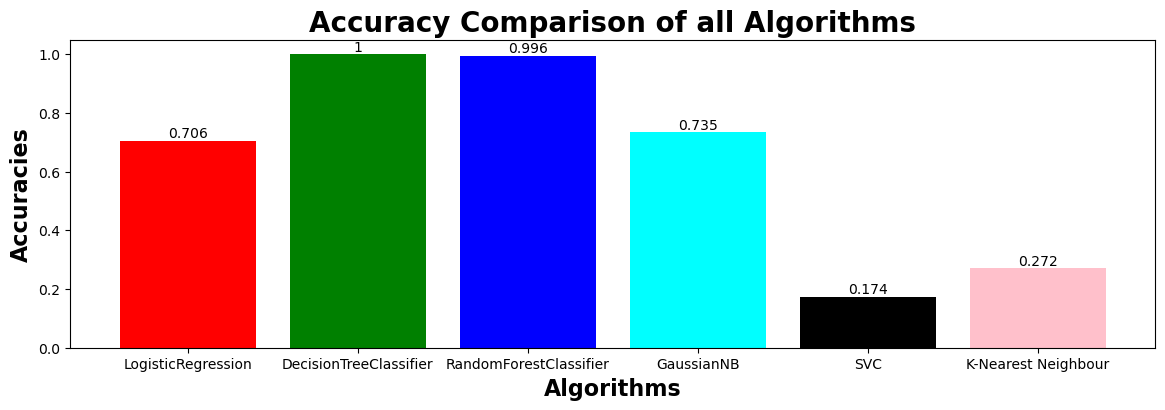

In [26]:
x=['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier','GaussianNB','SVC', 'K-Nearest Neighbour']
y=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]


plt.figure(figsize=(14,4))
label=plt.bar(x,y, color=['red','green','blue', 'cyan', 'black', 'pink'])

plt.title("Accuracy Comparison of all Algorithms", fontsize=20, fontweight='bold')
plt.xlabel("Algorithms", fontsize=16, fontweight='bold')
plt.ylabel("Accuracies", fontsize=16, fontweight='bold')
plt.bar_label(label)
plt.show()

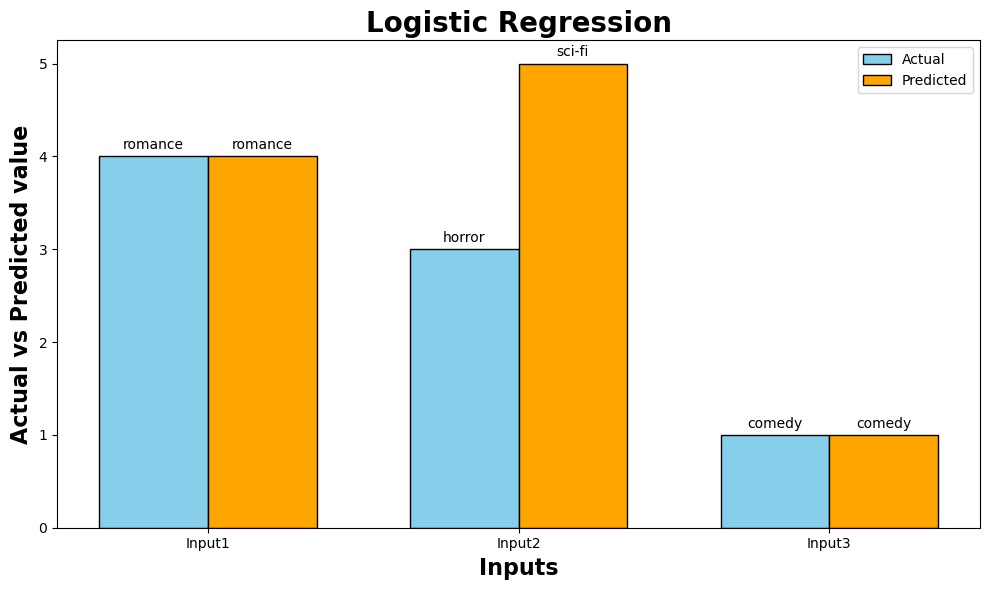

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[4,5,1]

#assigning bar labels
label1=['romance', 'horror','comedy']
label2=['romance', 'sci-fi','comedy']


#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width,
                  label='Actual',color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values,
                     width,label='Predicted', color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("Logistic Regression", fontsize=20, fontweight='bold')
ax.set_xlabel("Inputs", fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value", fontweight='bold', fontsize=16)
plt.legend()

# Add labels 
ax.bar_label(bar_actual,labels=label1, padding=3)
ax.bar_label(bar_predicted,labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()



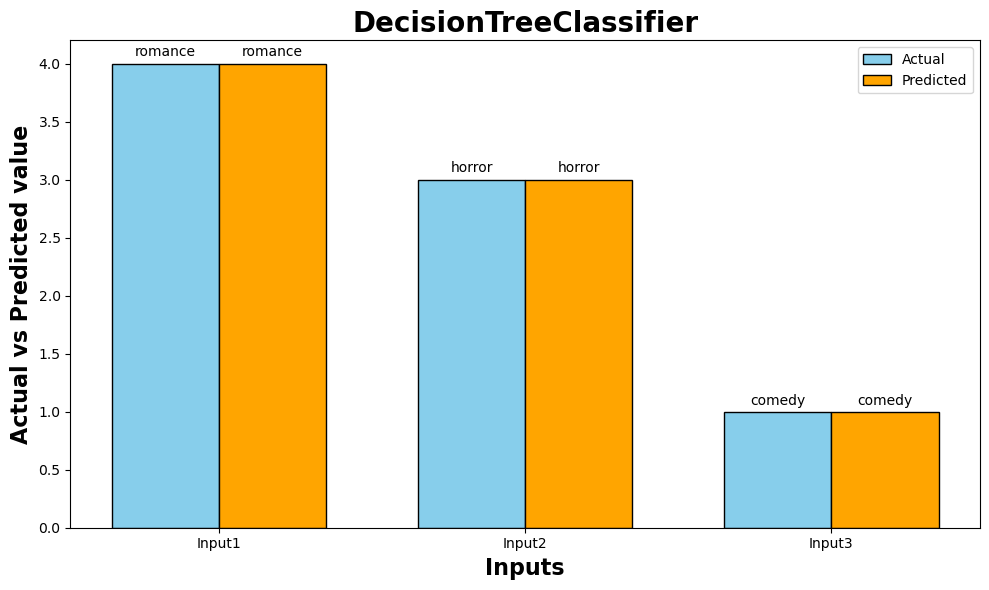

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[4,3,1]


#assigning bar labels
label1=['romance', 'horror','comedy']
label2=['romance', 'horror','comedy']


#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width,label='Actual',
                  color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values
                     ,width,label='Predicted',
                       color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("DecisionTreeClassifier", 
             fontsize=20, fontweight='bold')
ax.set_xlabel("Inputs", fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value",
               fontweight='bold', fontsize=16)
plt.legend()

# Add labels 
ax.bar_label(bar_actual, labels=label1, padding=3)
ax.bar_label(bar_predicted, labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()



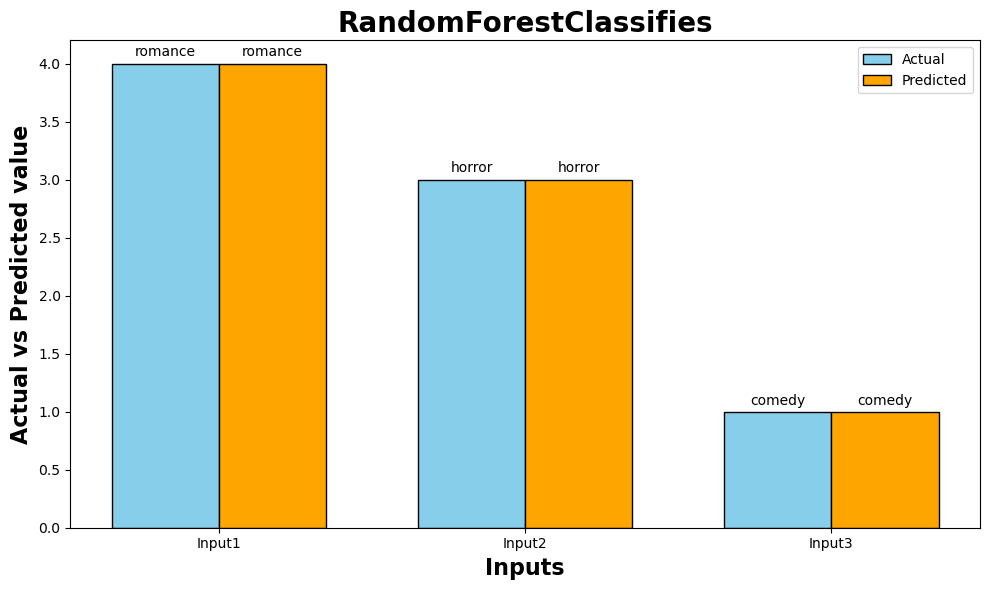

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[4,3,1]

#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width
                  ,label='Actual',color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values,
                     width,label='Predicted', color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("RandomForestClassifies", 
             fontsize=20, fontweight='bold')
ax.set_xlabel("Inputs", fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value",
               fontweight='bold', fontsize=16)
plt.legend()


# Add labels 
ax.bar_label(bar_actual, labels=label1, padding=3)
ax.bar_label(bar_predicted, labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()



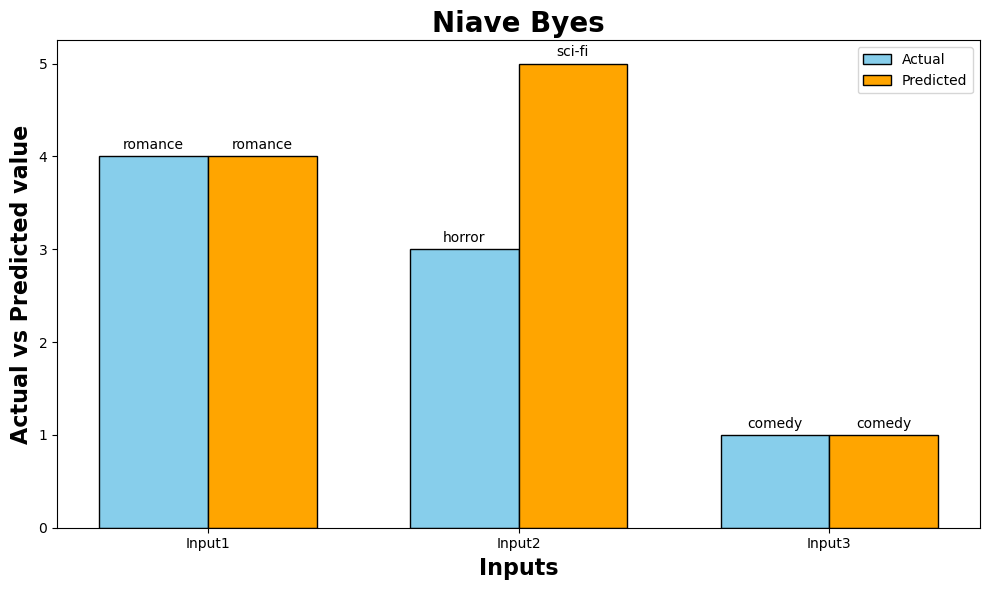

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[4,5,1]

#assigning bar labels
label1=['romance', 'horror','comedy']
label2=['romance', 'sci-fi','comedy']


#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width,
                  label='Actual',color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values,width,
                     label='Predicted', color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("Niave Byes", fontsize=20, 
             fontweight='bold')
ax.set_xlabel("Inputs", fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value", 
              fontweight='bold', fontsize=16)
plt.legend()


## Add labels 
ax.bar_label(bar_actual, labels=label1, padding=3)
ax.bar_label(bar_predicted, labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()



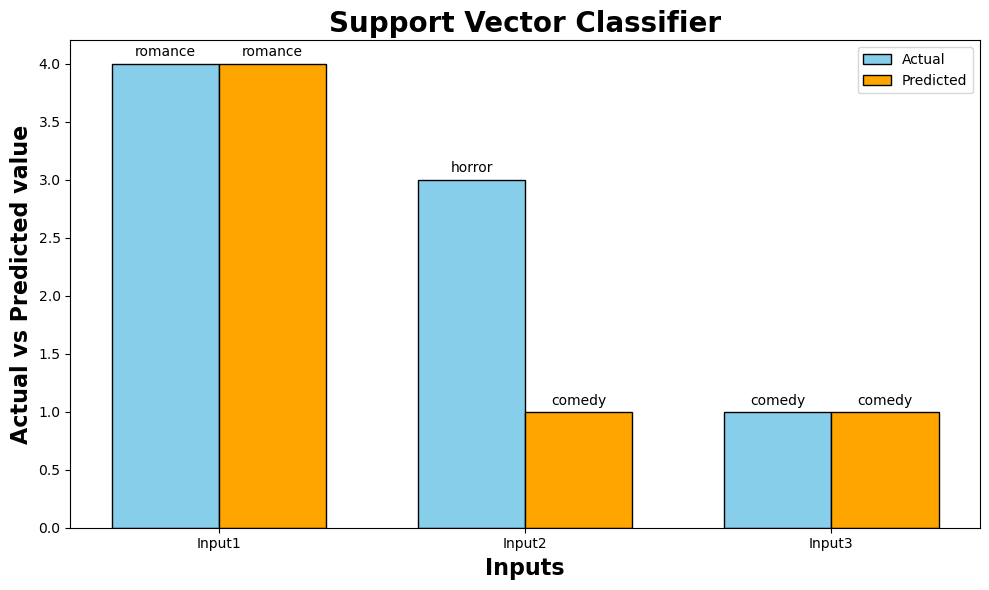

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[4,1,1]


#assigning bar labels
label1=['romance', 'horror','comedy']
label2=['romance', 'comedy','comedy']

#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width,
                  label='Actual',color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values,width,
                     label='Predicted', color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("Support Vector Classifier", fontsize=20, fontweight='bold')
ax.set_xlabel("Inputs", fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value", fontweight='bold', fontsize=16)
plt.legend()

# Add labels 
ax.bar_label(bar_actual, labels=label1, padding=3)
ax.bar_label(bar_predicted, labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()



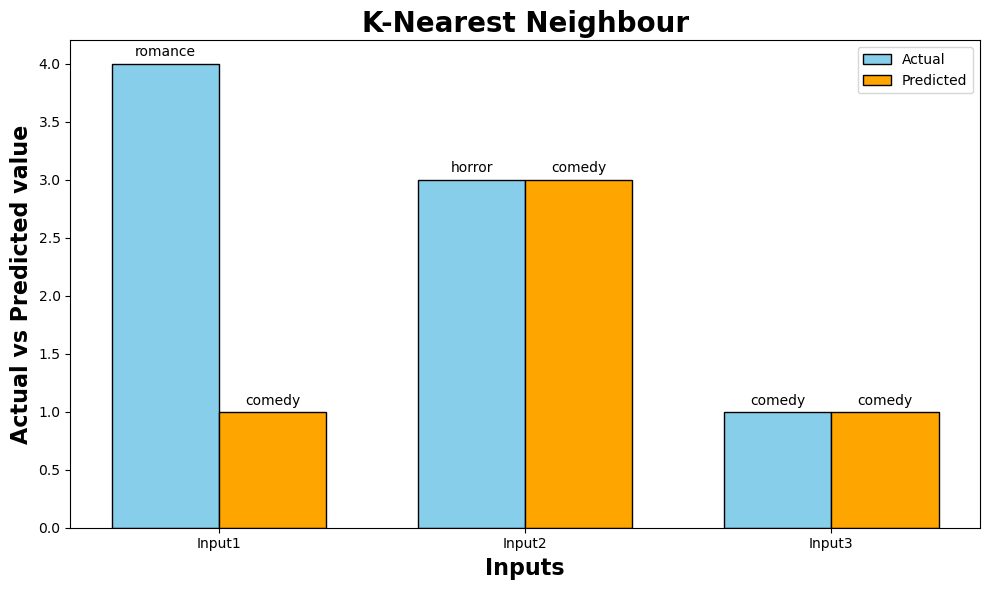

In [32]:
import matplotlib.pyplot as plt
import numpy as np

#Label for x-axis group
Inputs=['Input1', 'Input2', 'Input3']

#Assigning Actual vs Predicted Value
Actual_Value=[4,3,1]
Predicted_values=[1,3,1]


#assigning bar labels
label1=['romance', 'horror','comedy']
label2=['comedy', 'comedy','comedy']

#number of groups
n=len(Inputs)

#x positons
x=np.arange(n)

# Width of each bar

width=0.35

#create figure and axis
fig,ax=plt.subplots(figsize=(10,6))

#plot Actual bars
bar_actual=ax.bar(x,Actual_Value,width,
                  label='Actual',color='skyblue', edgecolor='black')

#plot Predicted bars
bar_predicted=ax.bar(x + width,Predicted_values,width,
                     label='Predicted', color='orange', edgecolor='black')


#Lables and Titles
ax.set_title("K-Nearest Neighbour", 
             fontsize=20, fontweight='bold')
ax.set_xlabel("Inputs", 
              fontweight='bold', fontsize=16)
ax.set_xticks(x+width/2)
ax.set_xticklabels(Inputs)
ax.set_ylabel("Actual vs Predicted value", 
              fontweight='bold', fontsize=16)
plt.legend()

# Add labels 
ax.bar_label(bar_actual, labels=label1, padding=3)
ax.bar_label(bar_predicted, labels=label2, padding=3)


# Adjust layout
plt.tight_layout()
plt.show()